![diag1.png](diag4.png)

Zmienne nieprimowane są na zewnątrz kryształu ($n=1$), a primowane wewnątrz
$$f_{in}=f_{out} \Longrightarrow \frac{v_{in}}{\lambda_{in}}=\frac{c}{\lambda_{out}}\Longrightarrow \frac{1}{\lambda_{in}}=\frac{c}{v_{in}}\frac{1}{\lambda_{out}}=n\frac{1}{\lambda_{out}}$$
$$\lambda_s=\lambda_i\quad\text{Po wyjściu z kryształu foton jałowy i sygnałowy mają mieć tą samą długość fali}$$
$$\frac{1}{\lambda_p}=\frac{1}{\lambda_s}+\frac{1}{\lambda_i}\quad\text{Zasada zachowania energii na zewnątrz kryształu}$$
Z powyższych: $\lambda_s=\lambda_i=2\lambda_p$, a skoro jałowy i sygnałowy są promieniami zwyczajnymi, to $\lambda_s^\prime=\lambda_i^\prime$, więc $k_i^\prime=k_s^\prime$ oraz $\alpha^\prime=\beta^\prime$

$$\vec{k_p^\prime}=\vec{k_s^\prime}+\vec{k_i^\prime}\quad\text{Dopasowanie fazowe w krysztale}$$
$$k_p^\prime=2k_s^\prime\cos\alpha^\prime\quad\text{Tw. cosinusów}$$

$$\frac{n_{e,eff}(\lambda_p,\gamma^\prime+\theta_c)}{\lambda_p}=2\frac{n_o}{\lambda_s} \cos\alpha^\prime \quad(*)$$
$$\sin\gamma = n_{e,eff}(\lambda_p,\gamma^\prime+\theta_c)\sin(\gamma^\prime)\quad\text{Prawo Snelliusa}\quad(**)$$

Kąt między fotonem jałowym, a normalną do powierzchni kryształu wynosi $\beta^\prime - \gamma^\prime$,\
będzie on ujemny gdy foton jałowy będzie miał kierunek do góry, a nie do dołu.\
Z prawa Snelliusa,
$$\sin(\alpha^\prime+\gamma^\prime)n_o(\lambda_s)=\sin(\alpha)\quad(\dagger)$$
$$\sin(\beta^\prime-\gamma^\prime)n_o(\lambda_i)=\sin(\beta)\quad(\ddagger)$$

SNLO podaje że optymalny kąt między osią optyczną, a promieniem pompującym to $\theta_{OPT}=\theta(\lambda_p,\lambda_s,\lambda_i)=31.7^\circ$,\
skoro oś optyczna kryształu z jego normalną do powierzchni tworzy kąt $\theta_C$,\
to optymalny kąt między normalną, a promieniem pompującym wynosi
$$\gamma^\prime_{OPT}=\theta_{OPT}-\theta_C$$
Więc optymalny kąt padania promienia pompującego na kryształ wynosi (z **)
$$\gamma_{OPT}=\arcsin\left(n_{e,eff}(\lambda_p,\gamma^\prime_{OPT}+\theta_c)\sin(\gamma^\prime_{OPT})\right)$$

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
from engineering_notation import *
from BBO import *
from scipy.optimize import fsolve
import warnings

warnings.filterwarnings("ignore", message="The iteration is not making good progress")
# warnings.filterwarnings("error")

Text(0.5, 1.0, 'Zależność kątów między wychodzącymi wiązkami, a normalną do powierzchni kryształu od kąta padania wiązki pompującej\n proces SDPC I $\\lambda_s=\\lambda_i=2\\lambda_p=0.37~\\mu$m, $\\theta_C=0.51^\\circ$')

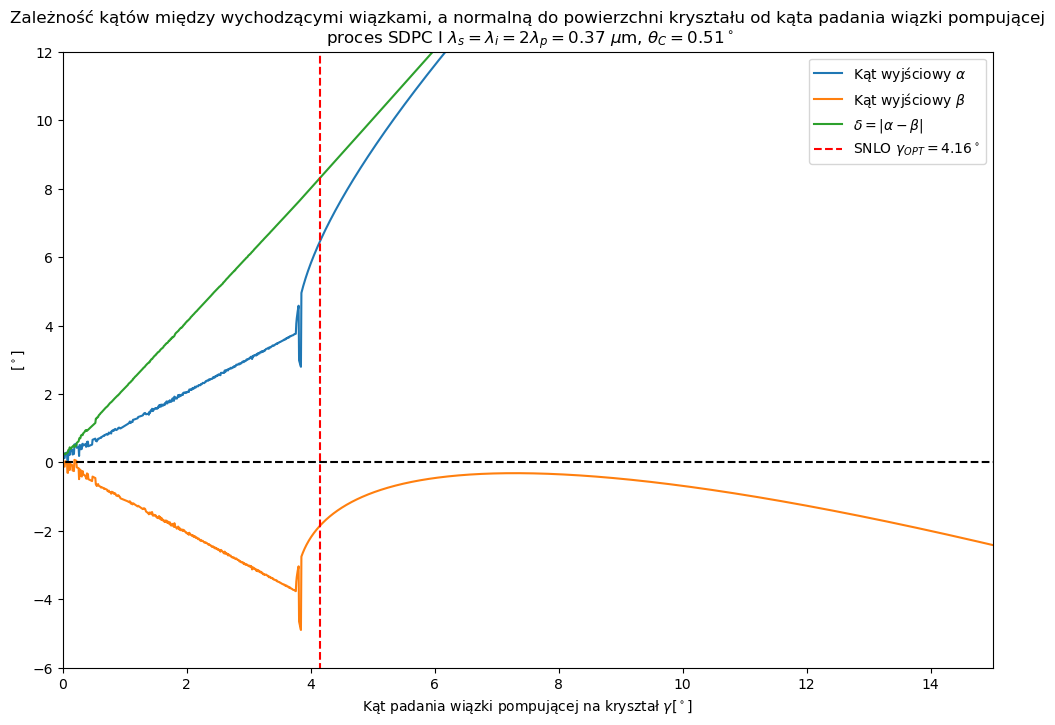

In [22]:
# THETA_OPT jest wynikiem SNLO
lp, THETA_C, THETA_OPT = 0.370, np.radians(29.2), radians(31.7)  # Nasze
# lp, THETA_C, THETA_OPT = 0.3511, np.radians(49.63), radians(32.9)  # Kwiat et al.,
# ale u nich przechylenie płaszczyzny o 0.72 Deg
# lp, THETA_C, THETA_OPT = 0.4579, np.radians(26.13), radians(25.7)  # Galvez et al.
# lp, THETA_C, THETA_OPT = 0.49, np.radians(28), radians(0)  # Zadanie

ls = 2 * lp
li = ls


# Uzależnić układ równań od gamma
def calculate(vars, gamma):
    # z *, **, dag, ddag:
    global li, ls, lp, THETA_C
    alpha, beta, alphaP, gammaP = vars
    betaP = alphaP
    return (
        sin(gamma) - neeff(lp, gammaP + THETA_C) * sin(gammaP),
        neeff(lp, gammaP + THETA_C) / lp - 2 * no(ls) / ls * cos(alphaP),
        sin(alphaP + gammaP) * no(ls) - sin(alpha),
        sin(betaP - gammaP) * no(li) - sin(beta),
    )


gs = np.linspace(-np.pi / 12, np.pi / 12, num=4000)
all = []
for g in gs:
    all.append(fsolve(calculate, (0, 0, 0, 0), g))

all = np.array(all)
plt.plot(degrees(gs), degrees(all[:, 0]), label="Kąt wyjściowy $\\alpha$")
plt.plot(degrees(gs), degrees(all[:, 1]), label="Kąt wyjściowy $\\beta$")
plt.plot(
    degrees(gs),
    abs(degrees(all[:, 0]) - degrees(all[:, 1])),
    label="$\\delta=|\\alpha-\\beta|$",
)
# Jakie gamma, by theta było jak z SNLO?
GAMMA_OPT = arcsin(neeff(lp, THETA_OPT) * sin(THETA_OPT - THETA_C))
plt.plot(
    [degrees(GAMMA_OPT), degrees(GAMMA_OPT)],
    [-100, 100],
    "r--",
    label="SNLO $\gamma_{OPT} = %0.2f ^\\circ$" % round(degrees(GAMMA_OPT), 2),
)
plt.plot([-15, 15], [0, 0], "k--")
plt.legend()
plt.xlim(0, 15)
plt.ylim(-6, 12)
plt.xlabel("Kąt padania wiązki pompującej na kryształ $\\gamma [^\\circ]$")
plt.ylabel("$[^\\circ]$")
plt.title(
    "Zależność kątów między wychodzącymi wiązkami, a normalną do powierzchni kryształu od kąta padania wiązki pompującej\n proces SDPC I $\\lambda_s=\\lambda_i=2\\lambda_p=%.2f~\\mu$m, $\\theta_C=%.2f^\\circ$"
    % (lp, THETA_C)
)

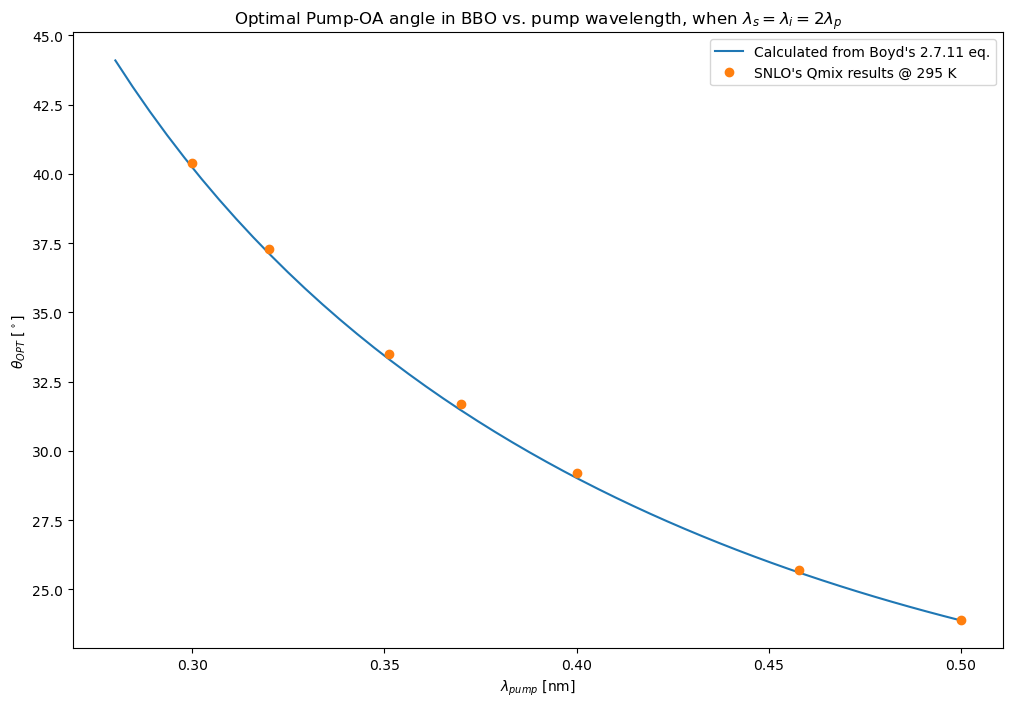

In [3]:
# możeby obliczyć THETA_OPT samodzielnie?
def getOptimalTheta(lp, ls):
    return arcsin(
        sqrt((no(ls) ** -2 - no(lp) ** -2) / (ne(lp) ** -2 - no(lp) ** -2))
    )  # eq 2.7.11 Boyd "Nonlinear optics"


L = np.array(np.linspace(0.280, 0.500))
plt.title(
    "Optimal Pump-OA angle in BBO vs. pump wavelength, when $\\lambda_s=\\lambda_i=2\\lambda_p$"
)
plt.ylabel("$\\theta_{OPT}~[^\\circ]$")
plt.xlabel("$\\lambda_{pump}~$[nm]")
plt.plot(
    L,
    [degrees(getOptimalTheta(l, 2 * l)) for l in L],
    label="Calculated from Boyd's 2.7.11 eq.",
)
plt.plot(
    [0.300, 0.320, 0.3511, 0.370, 0.400, 0.4579, 0.5],
    [40.4, 37.3, 33.5, 31.7, 29.2, 25.7, 23.9],
    "o",
    label="SNLO's Qmix results @ 295 K",
)

plt.legend()

## Tolerancja kątowa
Tolerancja kątowa $\theta_{tol}$, zależy od **grubości** kryształu $L$:
$$\theta_{tol}=\frac{0.31 \text{~mrad~cm}}{L}$$
Dla kryształu o grubości 0.1 cm, jest to:

In [89]:
degrees(0.31e-3) / (0.1e-2)

17.76169164905552


## Wyniki z SNLO - nieistotne, brudnopis

```
       740.0(o)+  740.0(o)=  370.0(e)
Walkoff [mrad]   =     0.00   0.00  71.86
Phase velocities = c/  1.662  1.662  1.662
Group velocities = c/  1.689  1.689  1.760
GrpDelDisp(fs^2/mm) =   85.0   85.0  218.6
At theta             =   31.7    deg.
Deff                 =  1.98E0   pm/V
S_o × L^2            =  2.15E7   Watt
Crystal ang. tol.×L  =    0.31   mrad°cm
Temperature range×L  =   18.04   K°cm
Mix accpt ang×L =     0.62    0.62 mrad°cm
Mix accpt bw×L  =   425.23  425.23 GHz°cm

       740.0(e)+  740.0(o)=  370.0(e)
Walkoff [mrad]   =    71.73   0.00  77.29
Phase velocities = c/  1.599  1.662  1.631
Group velocities = c/  1.621  1.689  1.720
GrpDelDisp(fs^2/mm) =   73.4   85.0  200.0
At theta             =   46.1    deg.
Deff                 =  9.63E-1  pm/V
S_o × L^2            =  8.60E7   Watt
Crystal ang. tol.×L  =    0.54   mrad°cm
Temperature range×L  =   15.29   K°cm
Mix accpt ang×L =     8.31    0.58 mrad°cm
Mix accpt bw×L  =   301.59  966.97 GHz°cm```

# Poniżej inne metody rozwiązywania

/tmp/ipykernel_4856/478489733.py:2: RuntimeWarning: invalid value encountered in arccos
  return arccos(neeff(lp, THETA_C + gp) * ls / (2 * no(ls) * lp))


Text(0, 0.5, '$\\alpha^\\prime[^\\circ]$')

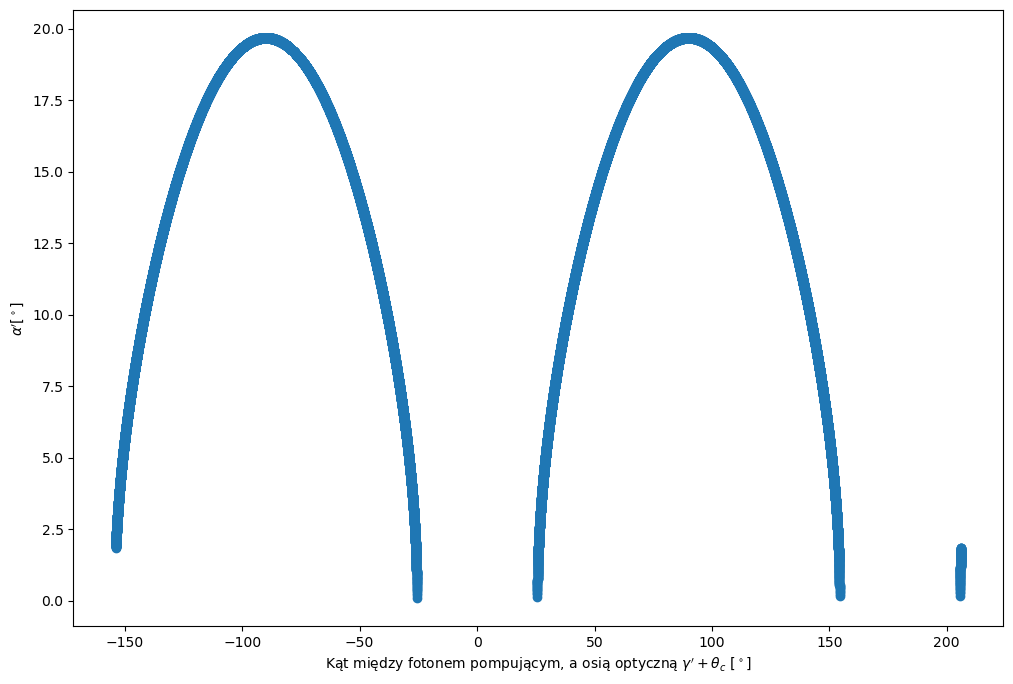

In [54]:
def ap(gp):
    return arccos(neeff(lp, THETA_C + gp) * ls / (2 * no(ls) * lp))


gps = np.linspace(-np.pi, np.pi, num=80000)

aps = []
tmpgps = []
for gp in gps:
    try:
        tmp1 = ap(gp)
    except Exception:
        pass
    else:
        aps.append(tmp1)
        tmpgps.append(gp)

gps = np.array(tmpgps)
bps = aps
plt.scatter(np.degrees(gps + THETA_C), np.degrees(aps), label="$\\alpha^\\prime$")
plt.xlabel(
    "Kąt między fotonem pompującym, a osią optyczną $\\gamma^\\prime+\\theta_c~[^\\circ]$"
)
plt.ylabel("$\\alpha^\\prime[^\\circ]$")
# plt.legend()

/tmp/ipykernel_4856/2179524880.py:6: RuntimeWarning: invalid value encountered in arcsin
  tmp1 = arcsin(neeff(lp, gp + THETA_C) * np.sin(gp))
/tmp/ipykernel_4856/478489733.py:2: RuntimeWarning: invalid value encountered in arccos
  return arccos(neeff(lp, THETA_C + gp) * ls / (2 * no(ls) * lp))


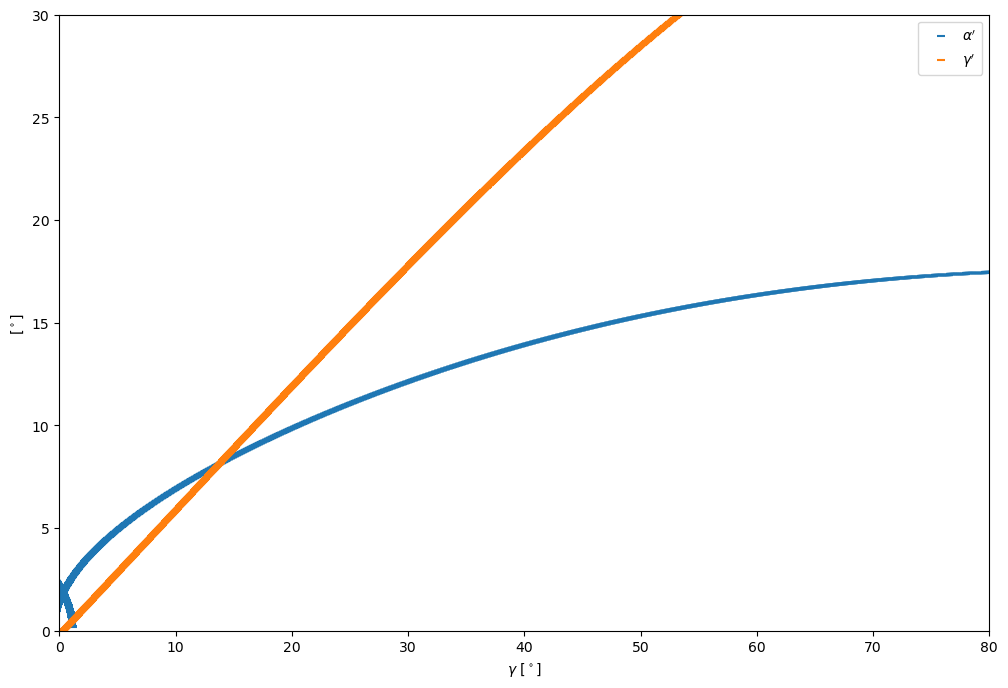

In [55]:
gs = []
gps2 = []
aps = []
for gp in gps:
    try:
        tmp1 = arcsin(neeff(lp, gp + THETA_C) * np.sin(gp))
        tmp2 = ap(gp)
    except RuntimeWarning:
        pass
    else:
        gs.append(tmp1)
        aps.append(tmp2)
        gps2.append(gp)

gs, gps2, aps = np.array(gs), np.array(gps2), np.array(aps)

plt.xlim(0, 80)
plt.ylim(0, 30)

plt.scatter(np.degrees(gs), np.degrees(aps), marker=1, label="$\\alpha^\\prime$")
plt.scatter(np.degrees(gs), np.degrees(gps2), marker=1, label="$\\gamma^\\prime$")

plt.xlabel("$\\gamma~[^\\circ]$")
plt.ylabel("$[^\\circ]$")
plt.legend()

Text(0, 0.5, '$\\beta^\\prime-\\gamma^\\prime~[^\\circ]$')

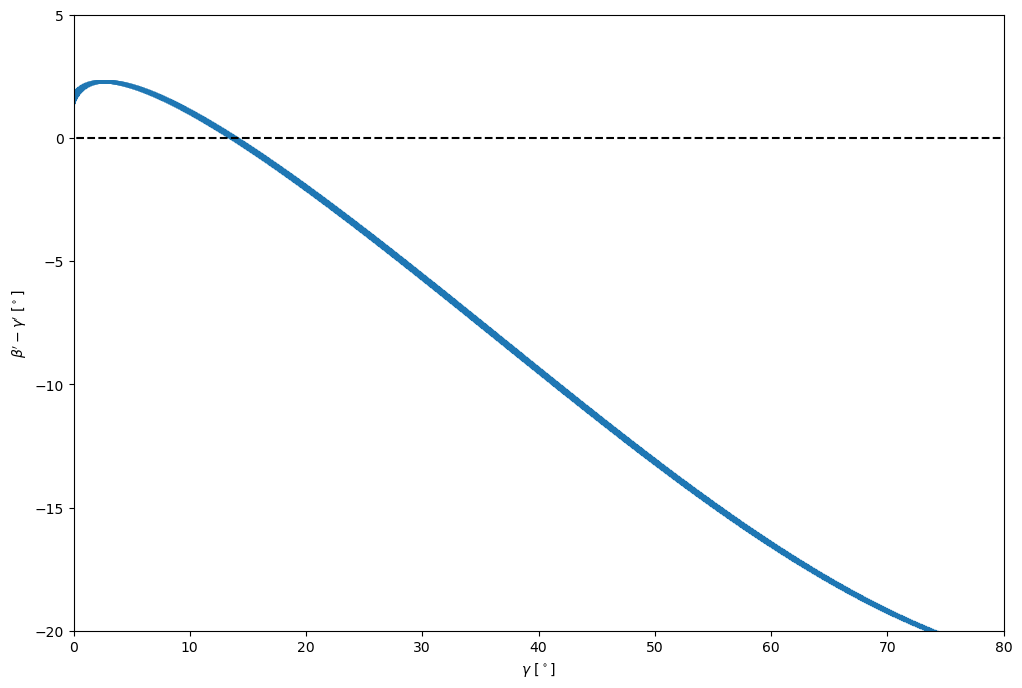

In [56]:
plt.xlim(0, 80)
plt.ylim(-20, 5)
plt.plot([-180, 180], [0, 0], "k--")

plt.scatter(np.degrees(gs), np.degrees(aps) - np.degrees(gps2), marker=1)

plt.xlabel("$\\gamma~[^\\circ]$")
plt.ylabel("$\\beta^\\prime-\\gamma^\\prime~[^\\circ]$")

/tmp/ipykernel_4856/2573486240.py:3: RuntimeWarning: invalid value encountered in arcsin
  np.degrees(arcsin(np.sin(gps2 - aps) * no(ls))),


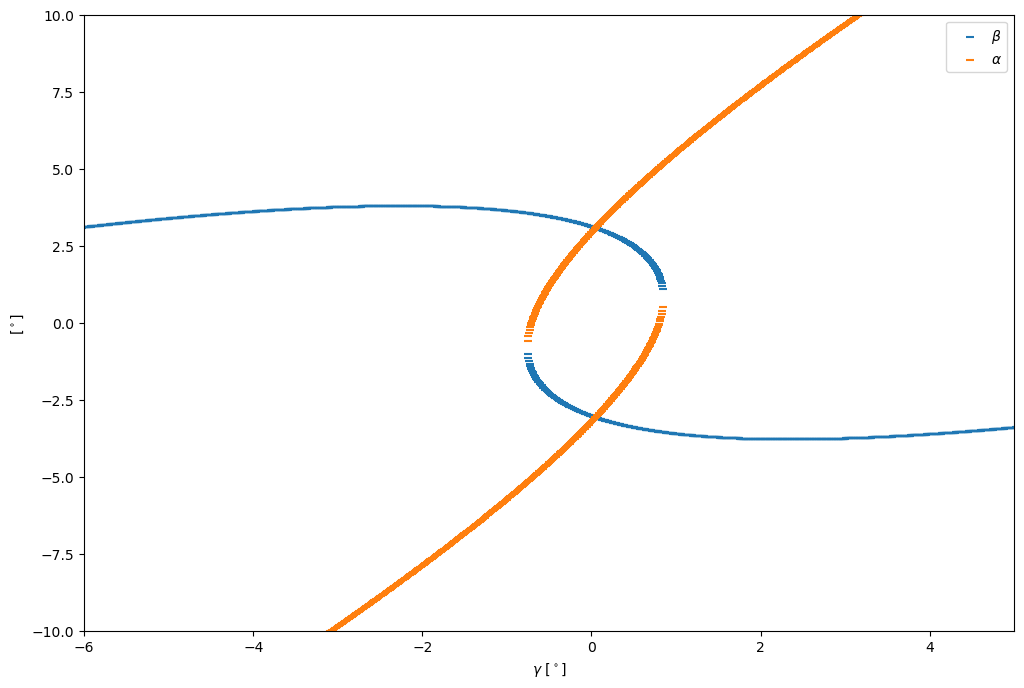

In [57]:
plt.scatter(
    np.degrees(gs),
    np.degrees(arcsin(np.sin(gps2 - aps) * no(ls))),
    label="$\\beta$",
    marker=1,
)
plt.scatter(
    np.degrees(gs),
    np.degrees(arcsin(np.sin(aps + gps2)) * no(li)),
    label="$\\alpha$",
    marker=1,
)

plt.xlim(-6, 5)
plt.ylim(-10, 10)

plt.xlabel("$\\gamma~[^\\circ]$")
plt.ylabel("$[^\\circ]$")
plt.legend()